In [2]:
#Read data
#!/usr/bin/env python
# coding: utf-8
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#path
folder_path = os.path.join(os.getcwd(), "Training_Data")
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') or f.endswith('.xls')]

all_data = []
#load data
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    #print(f"處理檔案: {excel_file}")
    
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    all_data.append(df)

feature = []
label = []

for df in all_data:   
    X = df[['LocationCode', 'WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)']]
    y = df['Power(mW)']
    
    feature.append(X)
    label.append(y)

print("read completed")

read completed


In [3]:
#Merge all data frames
data = pd.concat(all_data, axis = 0)

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1290894 entries, 0 to 52558
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   LocationCode     1290894 non-null  int64  
 1   DateTime         1290894 non-null  object 
 2   WindSpeed(m/s)   1290894 non-null  float64
 3   Pressure(hpa)    1290894 non-null  float64
 4   Temperature(°C)  1290894 non-null  float64
 5   Humidity(%)      1290894 non-null  float64
 6   Sunlight(Lux)    1290894 non-null  float64
 7   Power(mW)        1290894 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 88.6+ MB


,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,13,2024-01-26 16:01:40.000,0.0,1020.38,22.42,48.14,450.42,0.01
1,13,2024-01-26 16:02:40.000,0.0,1020.41,22.46,48.03,455.83,0.01
2,13,2024-01-26 16:03:40.000,0.0,1020.37,22.47,47.96,456.67,0.01
3,13,2024-01-26 16:04:40.000,0.0,1020.36,22.48,47.90,453.33,0.01
4,13,2024-01-26 16:05:40.000,0.0,1020.37,22.49,47.87,453.33,0.01


In [5]:
data.describe(include="all")

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,1.290894e+06,1290894,1.290894e+06,1.290894e+06,1.290894e+06,1.290894e+06,1.290894e+06,1.290894e+06
unique,NaN,1082852,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2024-07-03 16:31:07.000,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.238676e+00,NaN,3.225913e-01,1.009297e+03,3.048565e+01,6.933431e+01,2.133491e+04,2.483036e+02
std,5.050529e+00,NaN,7.665733e-01,1.678630e+01,8.962605e+00,2.488200e+01,2.893169e+04,4.830954e+02
min,1.000000e+00,NaN,0.000000e+00,9.581500e+02,2.000000e+00,1.143000e+01,2.000000e+01,0.000000e+00
25%,5.000000e+00,NaN,0.000000e+00,1.004600e+03,2.384000e+01,4.948000e+01,2.798330e+03,1.940000e+00
50%,9.000000e+00,NaN,0.000000e+00,1.008290e+03,2.932000e+01,7.139000e+01,8.405830e+03,1.709000e+01
75%,1.400000e+01,NaN,0.000000e+00,1.013510e+03,3.569000e+01,9.382000e+01,2.626333e+04,1.693400e+02


In [6]:
#Check for duplicate rows
dups = data.duplicated().sum()
print(f"Duplicate count: {dups}")

Duplicate count: 0


In [7]:
#Check for null values
nulls = data.isna().sum()
print(f"Null count: {nulls}") 

Null count: LocationCode       0
DateTime           0
WindSpeed(m/s)     0
Pressure(hpa)      0
Temperature(°C)    0
Humidity(%)        0
Sunlight(Lux)      0
Power(mW)          0
dtype: int64


In [8]:
#Uniques
print("Uniques values in:")
for i in data.columns:
    print(f"{i}: {data[i].nunique()}")

Uniques values in:
LocationCode: 17
DateTime: 1082852
WindSpeed(m/s): 1087
Pressure(hpa): 4811
Temperature(°C): 4860
Humidity(%): 8802
Sunlight(Lux): 96549
Power(mW): 97666


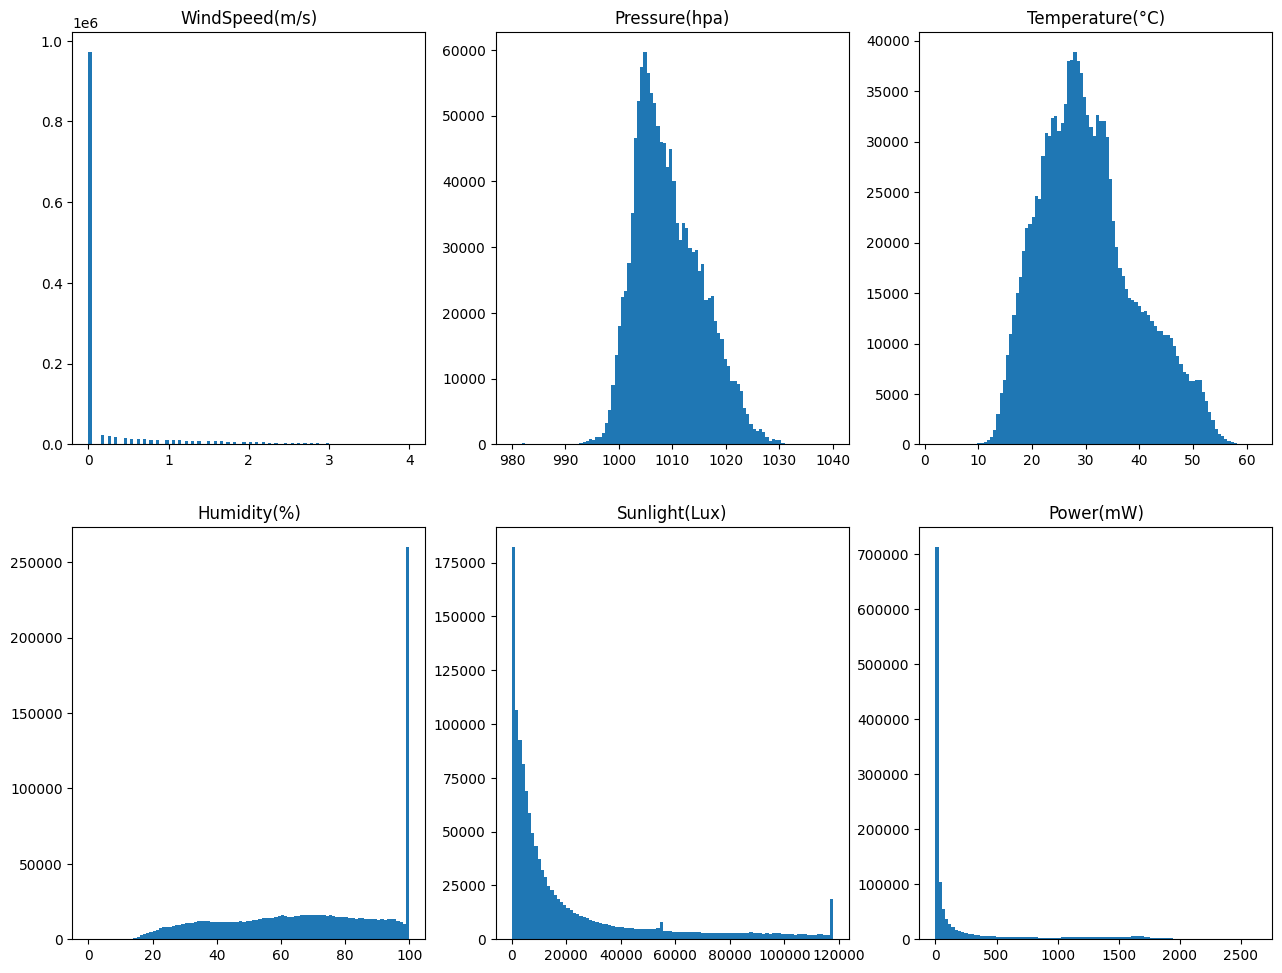

In [9]:
#Graph data distributions
import matplotlib.pyplot as plt

plt.subplots_adjust(top = 2, right = 2)
for index, col in enumerate(data):
    if col == 'LocationCode' or col == 'DateTime':
        continue
    
    plt.subplot(2, 3, index - 1)
    if(col == 'WindSpeed(m/s)'):
        plt.hist(data[col], bins=100, range=[0,4])
    elif(col == 'Pressure(hpa)'):
        plt.hist(data[col], bins=100, range=[980,1040])
    elif(col == 'Humidity(%)'):
        plt.hist(data[col], bins=100, range=[0,100])
    else:
        plt.hist(data[col], bins=100)
    plt.title(col)

plt.savefig("column_distribution.png", dpi=300, bbox_inches='tight')